# Exploratory Data Analysis and Visualization <a class="tocSkip">
    
## Instructor: Sang-Yun Oh <a class="tocSkip">

## Exploratory Data Analysis

- John W. Tukey (1915-2000) was a mathematician

- Fast Fourier Transform (Cooley-Tukey algorithm)

- Coined the phrase Exploratory Data Analysis (EDA)  
    ![EDA book](images/john-tukey.jpg)

## Exploratory Data Analysis

![EDA book](images/eda-book.jpg)

## Exploratory Data Analysis

> 'Exploratory data analysis' is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there. - Exploratory Data Analysis

> If we need a short suggestion of what exploratory data analysis is, I would suggest that: 1. it is an attitude, AND 2. a flexibility, AND 3. some graph paper (or transparencies, or both). - The collected works of John W. Tukey: Philosophy and principles of data analysis

### EDA should involve lots of visualization

## Bad Visualization

![(3D) pie charts](https://www.designyourway.net/diverse/2/wronginfo/60203066686.jpg)

![3D bar chart](https://static1.squarespace.com/static/55e61d62e4b0df4b0ce3dc61/t/58d466856a49630cabcb8807/1490314890663/3dbar.png)

![No axis labels](https://www.statschat.org.nz/wp-content/uploads/2013/09/iphone-sales.jpg)

![inconsistent axis](http://cs.colby.edu/courses/S14/cs251/LectureNotes/figures/developer_skills.jpg)

![Catchy graphics](https://www.statschat.org.nz/wp-content/uploads/2011/09/infographic-bad-laundry.png)

![Hmmmm](https://www.designyourway.net/diverse/2/wronginfo/59790878184.jpg)

[Bad visualizations](https://www.google.com/search?q=bad+visualizations&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiU2fG8qtnhAhXIna0KHXfsALkQ_AUIDigB&biw=1744&bih=1863)

[WTF Visualizations](http://viz.wtf/)

## Good Visualization

- [Gapminder Example](https://www.gapminder.org/tools/#$state$time$value=2018;&marker$axis_x$scaleType=linear;;;&chart-type=bubbles)

- Interactivity

- Good use of color, shapes, and sizes

- Clear labeling of components

- Axis (log vs. linear)

## Six categories of principles

- scale
- conditioning
- perception
- transformation
- context
- smoothing

[Berkeley's DS-100 textbook](https://github.com/DS-100/textbook)

## Principles of Scale

- Representative Chaffetz discussed in a congressional hearing [[full report](https://oversight.house.gov/interactivepage/plannedparenthood.)]

- Two numbers from Planned Parenthood programs:

- Number of abortions and cancer screenings  
    ![viz_planned_parenthood.png](https://github.com/DS-100/textbook/raw/master/assets/viz_planned_parenthood.png)

- In reality the plot looked like this:

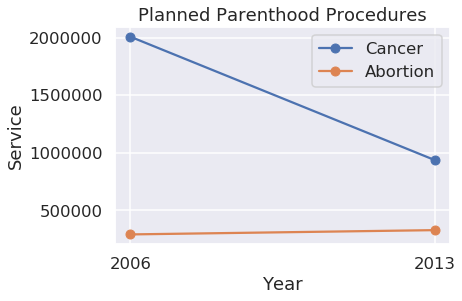

In [6]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

pp = pd.read_csv("data/plannedparenthood.csv")
plt.plot(pp['year'], pp['screening'], linestyle="solid", marker="o", label='Cancer')
plt.plot(pp['year'], pp['abortion'], linestyle="solid", marker="o", label='Abortion')
plt.title('Planned Parenthood Procedures')
plt.xlabel("Year")
plt.ylabel("Service")
plt.xticks([2006, 2013])
plt.legend();

- Zoom to appropriate scale

![viz_zoom.png](https://github.com/DS-100/textbook/raw/master/assets/viz_zoom.png)

## Principles of Conditioning

- The US Bureau of Labor Statistics oversees scientific surveys related to the economic health of the US

- Following compares median weekly earnings split by sex: [US Bureau of Labor Statistics](https://www.bls.gov/data/)  

- ![viz_earnings.png](https://github.com/DS-100/textbook/raw/master/assets/viz_earnings.png)

- Comparison between Men and Women are easier (wage gap)

- Lines are usually appropriate for ordinal and numerical data

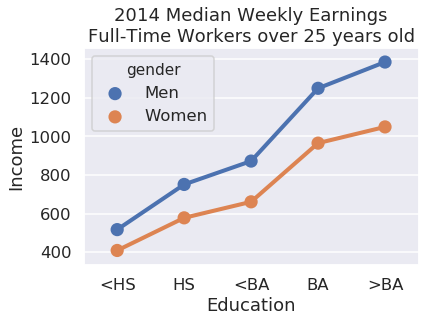

In [7]:
cps = pd.read_csv("data/edInc2.csv")
ax = sns.pointplot(x="educ", y="income", hue="gender", data=cps)

ticks = ["<HS", "HS", "<BA", "BA", ">BA"]
ax.set_xticklabels(ticks)
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");

## Principles of Perception

### Color perception

- Humans perceive colors differently

![checker-shadow.svg](https://upload.wikimedia.org/wikipedia/commons/b/be/Checker_shadow_illusion.svg)

![checker-shadow2.svg](https://upload.wikimedia.org/wikipedia/commons/2/21/Grey_square_optical_illusion_proof2.svg)

[Web color 787877](https://www.color-hex.com/color/787877)  
[Checker Shadow illusion](https://en.wikipedia.org/wiki/Checker_shadow_illusion)

- Not good!  
    ![viz_earnings.png](https://github.com/DS-100/textbook/raw/master/assets/viz_earnings.png)
    

- Qualitative colors:

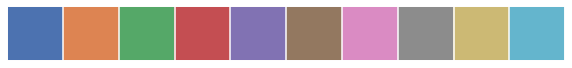

In [8]:
sns.palplot(sns.color_palette())

- Circular colors:

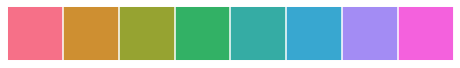

In [9]:
sns.palplot(sns.color_palette("husl", 8))

- Color Brewer interactive color chooser:

In [10]:
temp = sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

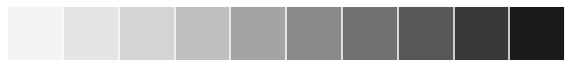

In [11]:
sns.palplot(sns.color_palette(temp))

- Color pallette from color names: e.g., [xkcd colors](https://xkcd.com/color/rgb/)

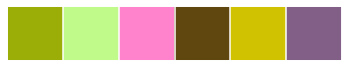

In [12]:
colors = ["puke green", "pistachio", "bubblegum pink", "mud brown", "ugly yellow", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

- Some sequential colors can be used as `colormaps`:  e.g., `cubehelix_palette()`

array([ 0.36, -0.83, -0.4 , ...,  0.29,  1.49, -1.3 ])

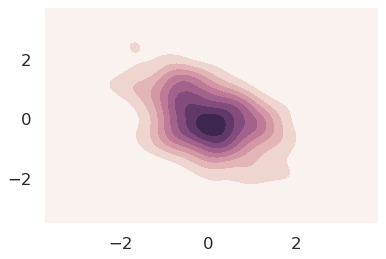

In [13]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);
y

- Diverging colors:

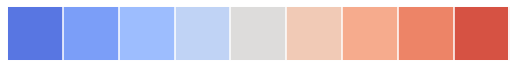

In [14]:
sns.palplot(sns.color_palette("coolwarm", 9))

- [NYTimes Middle-class Jobs visualization](https://www.nytimes.com/interactive/2015/02/23/business/economy/the-changing-nature-of-middle-class-jobs.html)

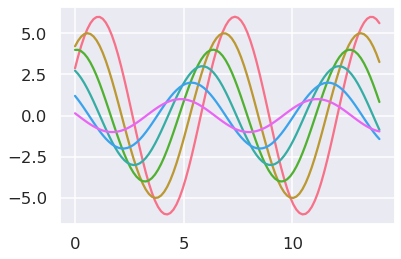

In [15]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set_palette("husl")
sinplot()

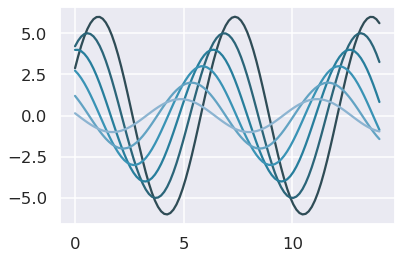

In [16]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

### Area vs Length perception

- Human's perception of lengths is better than areas

- South Africa is about twice that of Algeria

![viz_gdp.png](https://github.com/DS-100/textbook/raw/master/assets/viz_gdp_v2.png)

- South Africa is about twice that of Algeria

![viz_gdp.png](https://github.com/DS-100/textbook/raw/master/assets/viz_gdp.png)

### Moving target

- Human eyes do not detect changing baseline well

- Carbon dioxide emissions over time split by country.

![https://github.com/DS-100/textbook/raw/master/assets/viz_emissions.png](https://github.com/DS-100/textbook/raw/master/assets/viz_emissions.png)

- Does UK's emissions have increased or decreased over time?

- Changing baseline makes it difficult to see

![https://github.com/DS-100/textbook/raw/master/assets/viz_bar_stacked.jpeg](https://github.com/DS-100/textbook/raw/master/assets/viz_bar_stacked.jpeg)

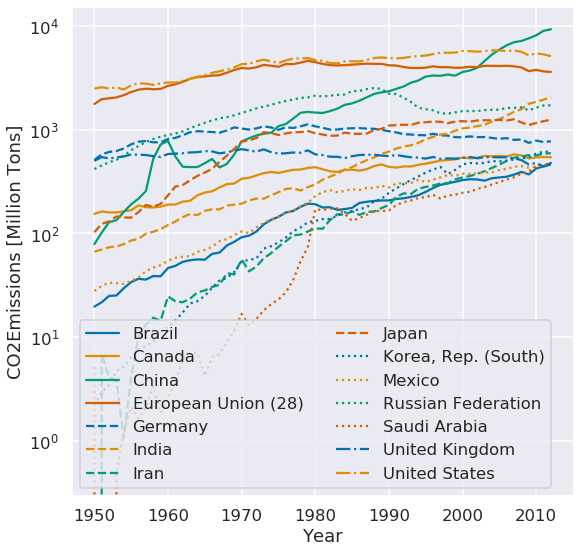

In [17]:
co2 = pd.read_csv("data/CAITcountryCO2.csv", skiprows = 2,
                  names = ["Country", "Year", "CO2"])
last_year = co2.Year.iloc[-1]
q = f"Country != 'World' and Country != 'European Union (15)' and Year == {last_year}"
top14_lasty = co2.query(q).sort_values('CO2', ascending=False).iloc[:14]
top14 = co2[co2.Country.isin(top14_lasty.Country) & (co2.Year >= 1950)]

from cycler import cycler

linestyles = (['-', '--', ':', '-.']*3)[:7]
colors = sns.color_palette('colorblind')[:4]
lines_c = cycler('linestyle', linestyles)
color_c = cycler('color', colors)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_prop_cycle(lines_c * color_c)

x, y ='Year', 'CO2'
for name, df in top14.groupby('Country'):
    ax.semilogy(df[x], df[y], label=name)

ax.set_xlabel(x)
ax.set_ylabel(y + "Emissions [Million Tons]")
ax.legend(ncol=2, frameon=True);

## Principles of Transformation

- Data transformation reveal non-linear relationships between variables

- Distribution of ticket fares on Titanic is right-skewed (right-tailed)

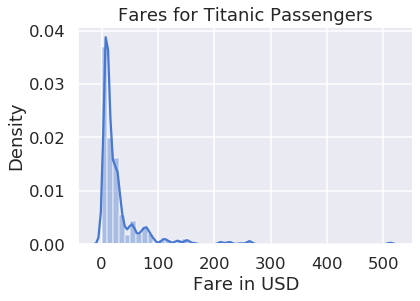

In [18]:
sns.set_palette(sns.color_palette("muted"))

ti = sns.load_dataset('titanic')
sns.distplot(ti['fare'])
plt.title('Fares for Titanic Passengers')
plt.xlabel('Fare in USD')
plt.ylabel('Density');

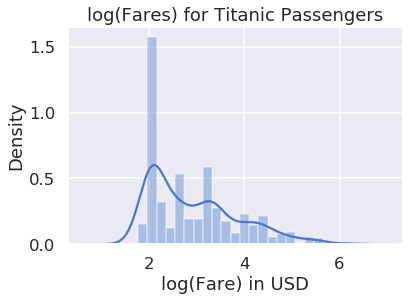

In [19]:
sns.distplot(np.log(ti.loc[ti['fare'] > 0, 'fare']), bins=25)
plt.title('log(Fares) for Titanic Passengers')
plt.xlabel('log(Fare) in USD')
plt.ylabel('Density');

- Kepler recorded planets distances to the sun and their periods of orbit

- Basis for Third Law of Planetary Motion

In [33]:
planets = pd.read_csv("data/planets.data", delim_whitespace=True, comment="#",usecols=[0, 1, 2])
planets

,planet,mean_dist,period
0,Mercury,0.39,87.77
1,Venus,0.72,224.70
2,Earth,1.00,365.25
3,Mars,1.52,686.95
4,Jupiter,5.20,4332.62
5,Saturn,9.51,10759.20


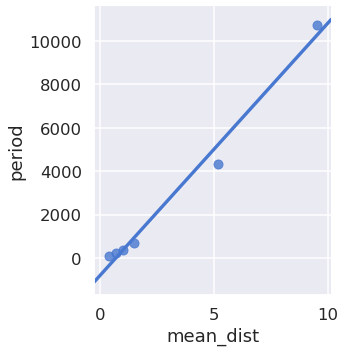

In [40]:
sns.lmplot(x='mean_dist', y='period', data=planets, ci=False);

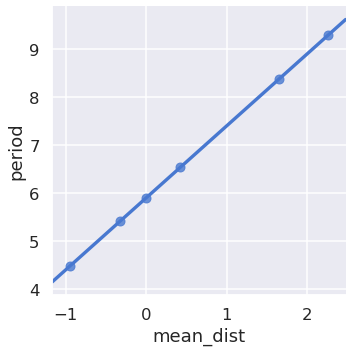

In [17]:
sns.lmplot(x='mean_dist', y='period',
           data=np.log(planets.iloc[:, [1, 2]]),
           ci=False);

$$
\begin{aligned}
\log(period) &= m \log(dist) + b \\
period &= e^{m \log(dist) + b} & \text{Taking the exponent of both sides} \\
period &= e^b dist^m \\
period &= C \cdot dist^m
\end{aligned}
$$

- Constant $ C = e^b $

- Two variables have a polynomial relationship, so log of the variables are linearly related

- Degree of the polynomial is slope of the line

- Slope is 1.5 which gives us Kepler's third law: $ period \propto dist^{1.5} $

- Similarly, if $ \log(y) $ and $ x $ have linear dependence, $x$ and $y$ have exponential relationship: $ y = a^x $

### Principles of Context

- Add as much relevant context as possible

- Following shows provides little context of what is being plotted

![https://github.com/DS-100/textbook/raw/master/assets/viz_538_before.png](https://github.com/DS-100/textbook/raw/master/assets/viz_538_before.png)

- Plots can be self-explanatory

- Add title, caption, axes labels, units for the axes, and labels for the plotted lines

![https://github.com/DS-100/textbook/raw/master/assets/viz_538_after.png](https://github.com/DS-100/textbook/raw/master/assets/viz_538_after.png)

([This blog post](https://www.dataquest.io/blog/making-538-plots/) explains how to make these modifications using `matplotlib`.)

In general, we provide context for a plot through:

- Plot title
- Axes labels
- Reference lines and markers for important values
- Labels for interesting points and unusual observations
- Captions that describe the data and its important features

### Principles of Smoothing

- Smoothing can help when there are many data points

- Histograms are a type of smoothing for rugplots: e.g. age of the passengers in the Titanic.

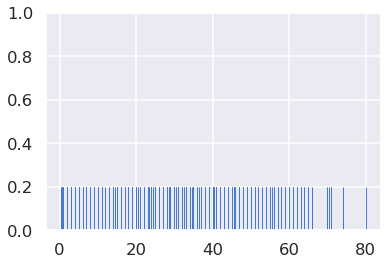

In [52]:
ages = ti['age'].dropna()
ages
sns.rugplot(ages, height=0.2);

In [53]:
ages

0      22.0
1      38.0
2      26.0
       ... 
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

- Histogram is helpful and _kernel density estimation_ (KDE) can be useful

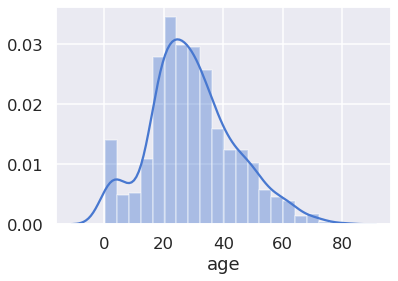

In [45]:
sns.distplot(ages, kde=True); # defaults to adding smoothing

### Gaussian Kernel Smoothing

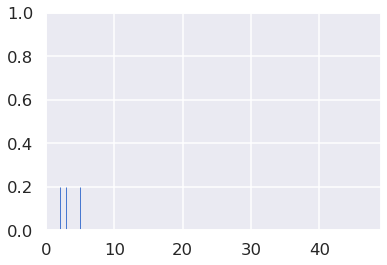

In [55]:
points = np.array([2, 3, 5])
sns.rugplot(points, height=0.2)
plt.xlim(0, 49);

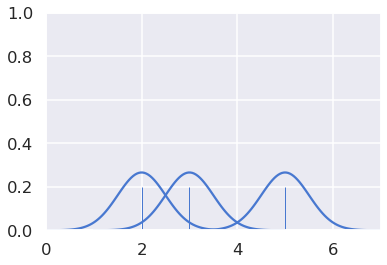

In [65]:
from scipy.stats import norm

def gaussians(points, scale=True, sd=0.5):
    x_vals = [np.linspace(point - 2, point + 2, 100) for point in points]
    y_vals = [norm.pdf(xs, loc=point, scale=sd) for xs, point in zip(x_vals, points)]
    if scale:
        y_vals = [ys / len(points) for ys in y_vals]
    return zip(x_vals, y_vals)

for x, ys in gaussians(points, scale=True):
    plt.plot(x, ys, c=sns.color_palette()[0])

sns.rugplot(points, height=0.2)
plt.xlim(0, 7)
plt.ylim(0, 1);

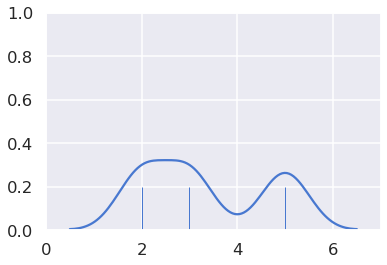

In [67]:
# HIDDEN
sns.rugplot(points, height=0.2)
sns.kdeplot(points, bw=0.5)
plt.xlim(0, 7)
plt.ylim(0, 1);

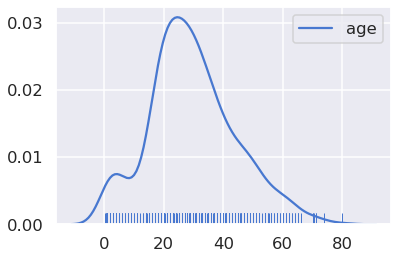

In [23]:
sns.kdeplot(ages)
sns.rugplot(ages);

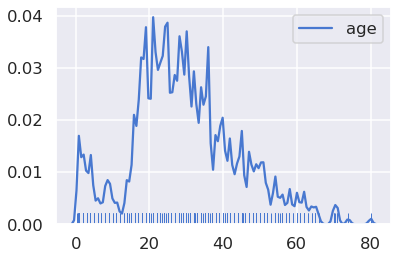

In [24]:
sns.kdeplot(ages, bw=0.5) # narrower Gaussian yields less smoothing
sns.rugplot(ages);

### Cherry Blossom Run data

- Annual 10-mile run in Washington D.C.

- Each runner can report their age and their race time

In [68]:
runners = pd.read_csv('data/cherryBlossomMen.csv').dropna()
runners

,year,place,age,time
0,1999,1,28.0,2819.0
1,1999,2,24.0,2821.0
2,1999,3,27.0,2823.0
...,...,...,...,...
70066,2012,7190,56.0,8840.0
70067,2012,7191,35.0,8850.0
70069,2012,7193,48.0,9059.0


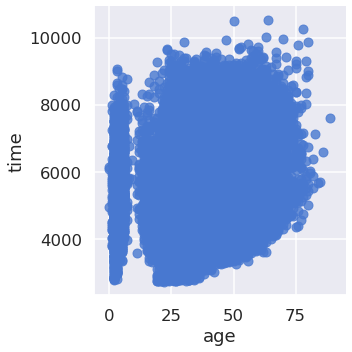

In [71]:
sns.lmplot(x='age', y='time', data=runners, fit_reg=False);

- Many points make it difficult to see any trend

- Two dimensional kernel smoothing!

### Two dimensional kernel density estimation

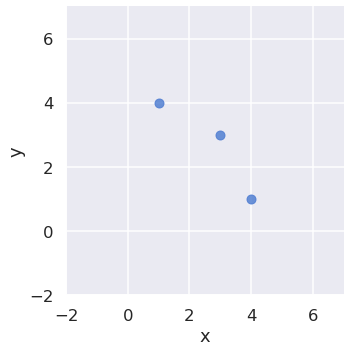

In [73]:
# Plot three points
two_d_points = pd.DataFrame({'x': [1, 3, 4], 'y': [4, 3, 1]})
sns.lmplot(x='x', y='y', data=two_d_points, fit_reg=False)
plt.xlim(-2, 7)
plt.ylim(-2, 7);

In [74]:
two_d_points['y']

0    4
1    3
2    1
Name: y, dtype: int64

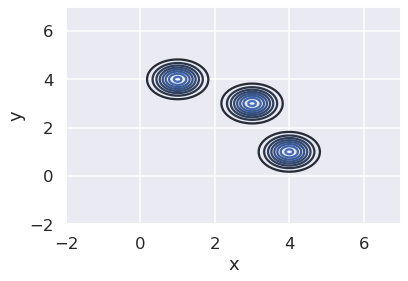

In [79]:
# Place a Gaussian at each point and use a contour plot to show each one
sns.kdeplot(two_d_points['x'], two_d_points['y'], bw=0.4)
plt.xlim(-2, 7)
plt.ylim(-2, 7);

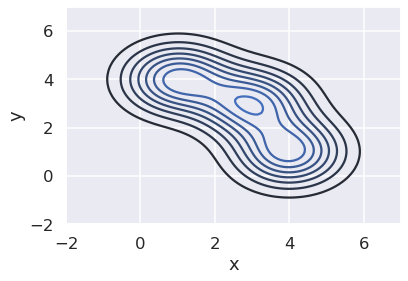

In [29]:
# Place a Gaussian at each point and use a contour plot to show each one
sns.kdeplot(two_d_points['x'], two_d_points['y'])
plt.xlim(-2, 7)
plt.ylim(-2, 7);

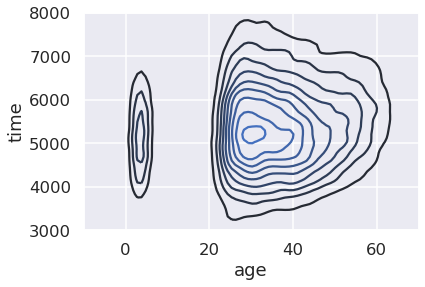

In [30]:
sns.kdeplot(runners['age'], runners['time'])
plt.xlim(-10, 70)
plt.ylim(3000, 8000);

- Most runners were between 25 and 50

- Most ran between 1 to 2 hours (4000-7000 seconds)

- Slight up-trend as age increases?

- Strange group of age between 0 and 10 years old

### Seaborn visualization documentaion

- Relational: [API](https://seaborn.pydata.org/api.html#relational-api) / [Tutorial](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial)
- Categorical: [API](https://seaborn.pydata.org/api.html#categorical-api) / [Tutorial](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)
- Distributions: [API](https://seaborn.pydata.org/api.html#distribution-api) / [Tutorial](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial)
- Regressions: [API](https://seaborn.pydata.org/api.html#regression-api) / [Tutorial](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)
- Multiples: [API](https://seaborn.pydata.org/api.html#grid-api) / [Tutorial](https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial)
- Style: [API](https://seaborn.pydata.org/api.html#style-api) / [Tutorial](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)
- Color: [API](https://seaborn.pydata.org/api.html#palette-api) / [Tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)